In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Step 1. Get the data from API and make a dataframe

In [2]:
# Make request to an URL
response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [3]:
file_contents= response.json()  #dictionary
print(type(file_contents))
print(len(file_contents))

<class 'dict'>
6


In [4]:
df = pd.DataFrame.from_dict(file_contents['data']) #all the needed info was condensed into one data column called 'data'
display(df.head())
display(df.shape)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


(8192, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


In [6]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


Step 2. Check the missing data and decide what to keep

In [7]:
df.isnull().sum()
#any missing values?

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
lifespan    0
dtype: int64

In [8]:
df[df.exercise.isnull()]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
1421,81.0,188.0,91.0,NaN,0.0,10.0,4,65


In [9]:
#df.loc[df.exercise.isnull(),'exercise']='1.0'  # Fill the value

In [10]:
#df[df.exercise.isnull()] # value is filled.

In [11]:
#df.exercise.value_counts() 

In [12]:
df= df[['genetic','length','mass','exercise','smoking','alcohol','sugar','lifespan']]
df.dropna(inplace=True)
print(df)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0        84.0   180.0  90.0       2.0      9.0      1.0      2        86
1        84.0   204.0  79.0       3.0      2.0      7.0      3       100
2        84.0   174.0  74.0       3.0     20.0      3.0      2        87
3        84.0   187.0  78.0       2.0      6.0      5.0      3        91
4        84.0   187.0  89.0       2.0     12.0      0.0      2        83
...       ...     ...   ...       ...      ...      ...    ...       ...
8187     82.0   185.0  67.0       3.0     11.0      8.0      2        90
8188     82.0   183.0  72.0       2.0      1.0      5.0      4        88
8189     83.0   192.0  92.0       1.0     22.0      2.0      4        62
8190     81.0   175.0  60.0       3.0     13.0      7.0      2        93
8191     83.0   204.0  76.0       3.0      8.0      8.0      1        96

[8185 rows x 8 columns]


In [13]:
df.duplicated().sum()

0

Step 3. Define BMI and Exploratory Data Analysis 

In [14]:
#Define BMI
df['BMI'] = df['mass']/(df['length']/100)**2
display(df.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114


In [15]:
df['BMI'].value_counts().head(5)

19.576333    15
24.655910    15
22.014014    14
23.629490    14
22.471209    14
Name: BMI, dtype: int64

In [16]:
#Why is it missing? Is it random?
#Impute or delete?
df = df.dropna()
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114


In [17]:
def bmi_category(bmi):
    if bmi > 40:
        return 'obese_3'
    elif bmi > 35:
        return 'obese_2'
    elif bmi > 30:
        return 'obese_1'
    elif bmi > 25:
        return 'over_weight'
    elif bmi >= 18.5:
        return 'normal_weight'
    elif bmi >= 17:
        return 'moderate_thin_weight'
    elif bmi >= 16:
        return 'mild_thin_weight'
    else:
        return 'severe_thin_weight'

In [18]:
import numpy as np
bmi_category = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
df['bmi_category']= pd.cut(df['BMI'], bins=bmi_category, labels=[ 'severe_thin_weight','mild_thin_weight','moderate_thin_weight','normal_weight','over_weight','obese_1','obese_2','obese_3'] )
df.head(12)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI,bmi_category
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114,over_weight
5,84.0,175.0,74.0,2.0,2.0,3.0,3,89,24.163265,normal_weight
6,84.0,196.0,68.0,2.0,14.0,8.0,1,80,17.700958,moderate_thin_weight
7,84.0,182.0,83.0,1.0,1.0,8.0,3,77,25.057360,over_weight
8,84.0,176.0,91.0,1.0,17.0,1.0,2,73,29.377583,over_weight
9,84.0,180.0,74.0,1.0,5.0,9.0,2,73,22.839506,normal_weight


From boxplot we can check the outliers. I tried 2 ways to remove the outliers. One way is using IQR. The ohter way is using DBSCAN cluster. According to correlation gradient there were no differences in coreelation.  Therefore outliers does not make any difference. I decided to keep the outliers.

<AxesSubplot: ylabel='exercise'>

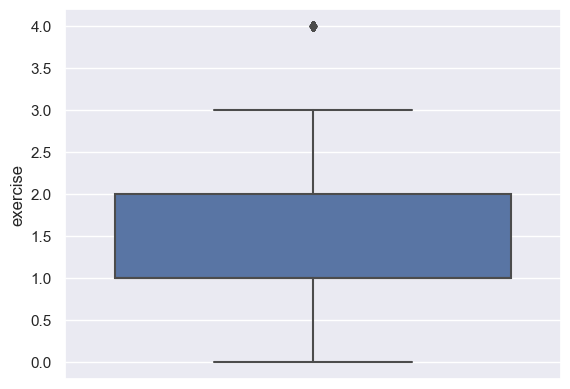

In [19]:
sns.boxplot(y=df['exercise'])

In [27]:
#Q1=df['exercise'].quantile(0.25)
#print("Q1:", Q1)

In [28]:
#Q3=df['exercise'].quantile(0.75)
#print("Q3:", Q3)

In [29]:
#IQR=Q3-Q1
#print("IQR: ", IQR)

In [30]:
#lower_bound = Q1 - 1.5*IQR
#print("Lower Bound:", lower_bound)

In [31]:
#upper_bound = Q3 + 1.5*IQR
#print("Upper Bound:", upper_bound)

In [32]:
#df_clean = df[(df['exercise']>lower_bound)&(df['exercise']<upper_bound)]
#sns.boxplot(y = df_clean['exercise'])

In [33]:
from sklearn.cluster import DBSCAN

DBSCAN, which stands for density-based spatial clustering of applications with noise, is an unsupervised clustering algorithm. This approach identifies any points that are loosely packed or sit alone outside of densely packed clusters as outliers.

In [34]:
X_train = df[['exercise','lifespan']]

In [35]:
model = DBSCAN()
model.fit(X_train)

DBSCAN()

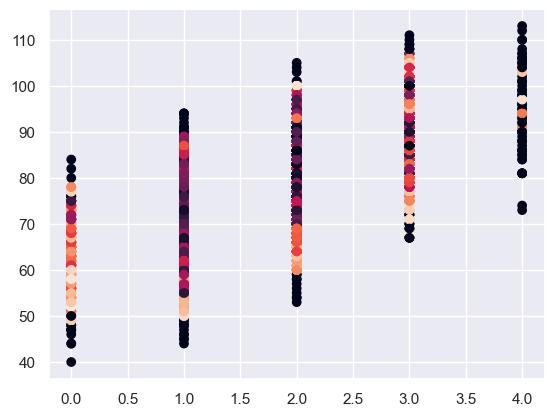

In [36]:
cluster_labels = model.labels_
plt.scatter(df["exercise"], df["lifespan"], c = cluster_labels)
plt.show()

In [37]:
df['labels'] = cluster_labels

In [38]:
df_cluster_clean = df[df['labels'] != -1]

<AxesSubplot: xlabel='exercise', ylabel='lifespan'>

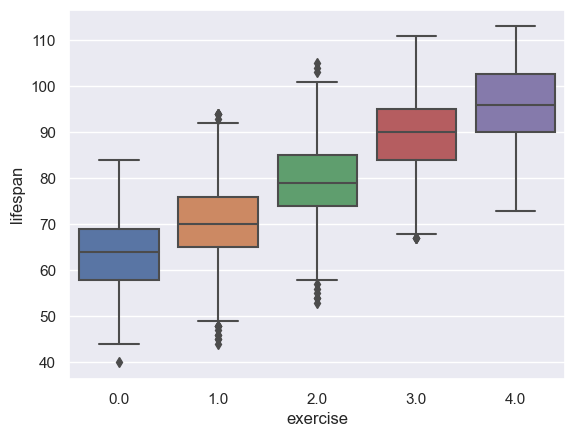

In [39]:
sns.boxplot(data=df, y= 'lifespan', x='exercise')

<AxesSubplot: xlabel='exercise', ylabel='lifespan'>

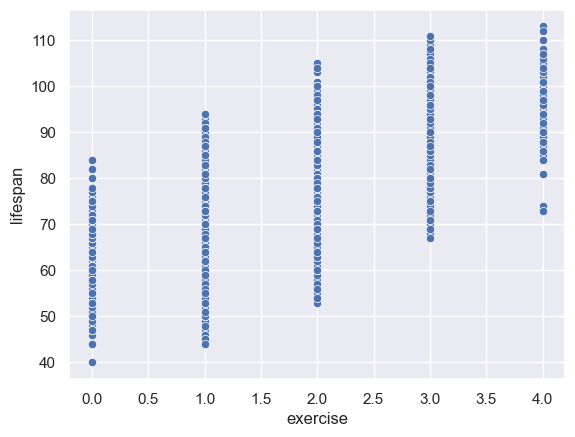

In [40]:
sns.scatterplot(data=df, y="lifespan", x='exercise')

Text(0.5, 0, 'Exercise Index, exercise (kg/m^2)')

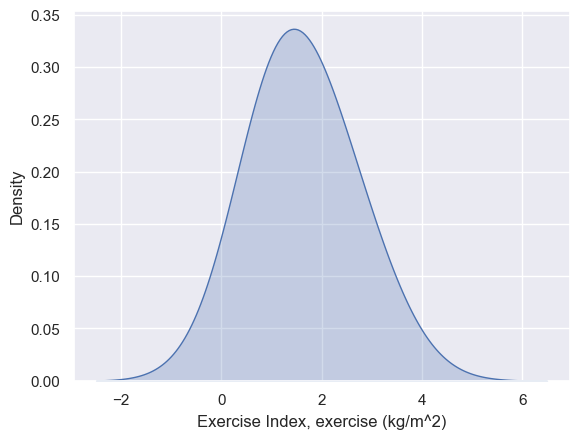

In [41]:
fig, ax = plt.subplots()
ax = sns.kdeplot(df['exercise'], fill=True, bw_method=1)
ax.set_xlabel('Exercise Index, exercise (kg/m^2)')

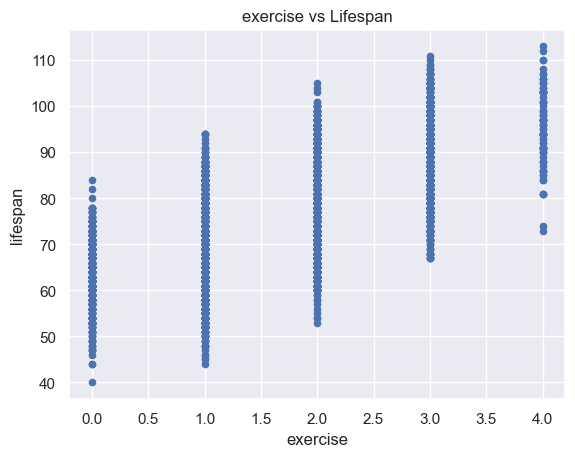

In [42]:
ax = df.plot(kind='scatter', y='lifespan', x='exercise', title='exercise vs Lifespan')

<AxesSubplot: xlabel='exercise', ylabel='lifespan'>

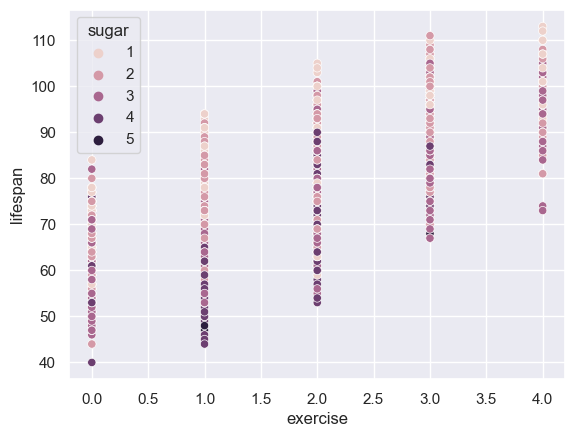

In [43]:
sns.scatterplot(data=df, x='exercise',y='lifespan', hue='sugar') 

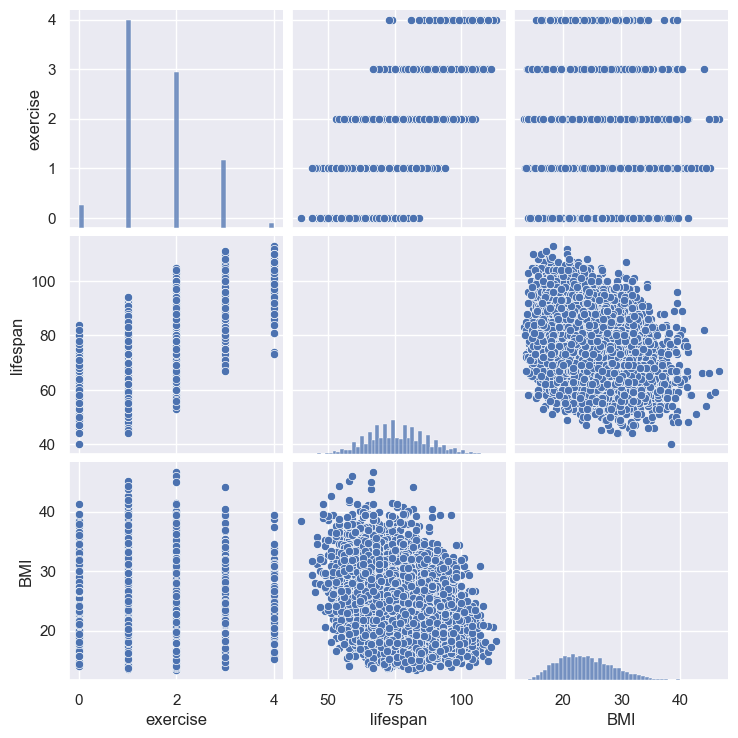

In [44]:
sns.pairplot(df[['exercise','lifespan','BMI']])
plt.show()

In [45]:
df_corr = df[['genetic',
      'length', 'mass', 
      'exercise', 'smoking',
       'alcohol', 'sugar', 'BMI','lifespan']].dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,genetic,length,mass,exercise,smoking,alcohol,sugar,BMI,lifespan
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,-0.008285,0.152144
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,-0.661776,0.179911
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,0.726123,-0.201487
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.005278,0.677365
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,0.019498,-0.525613
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.006255,-0.216818
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,0.014230,-0.263895
BMI,-0.008285,-0.661776,0.726123,0.005278,0.019498,-0.006255,0.014230,1.000000,-0.276963
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,-0.276963,1.000000


lifespan is highly related to exercise.

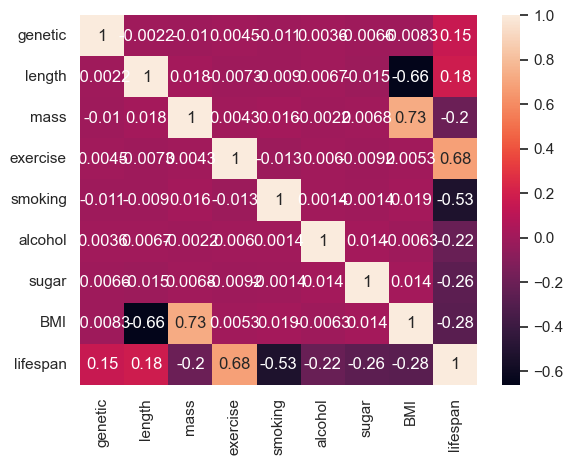

In [46]:
sns.heatmap(df_corr, annot=True)
plt.show()

In [47]:
df.groupby('bmi_category')['exercise'].mean()

bmi_category
severe_thin_weight      1.609375
mild_thin_weight        1.539823
moderate_thin_weight    1.603252
normal_weight           1.630938
over_weight             1.599074
obese_1                 1.654040
obese_2                 1.500000
obese_3                 1.560000
Name: exercise, dtype: float64

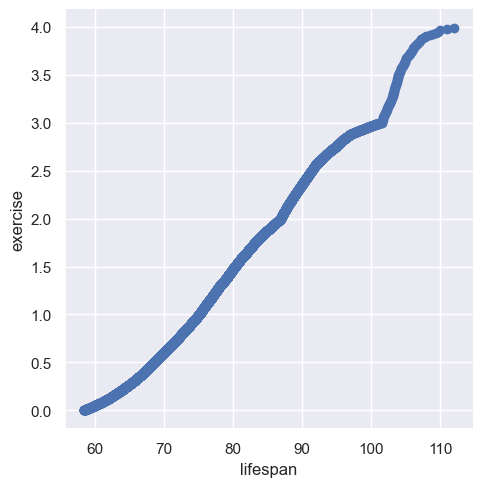

In [50]:
from seaborn_qqplot import pplot

pplot(df, x="lifespan", y="exercise", kind='qq', height=5)

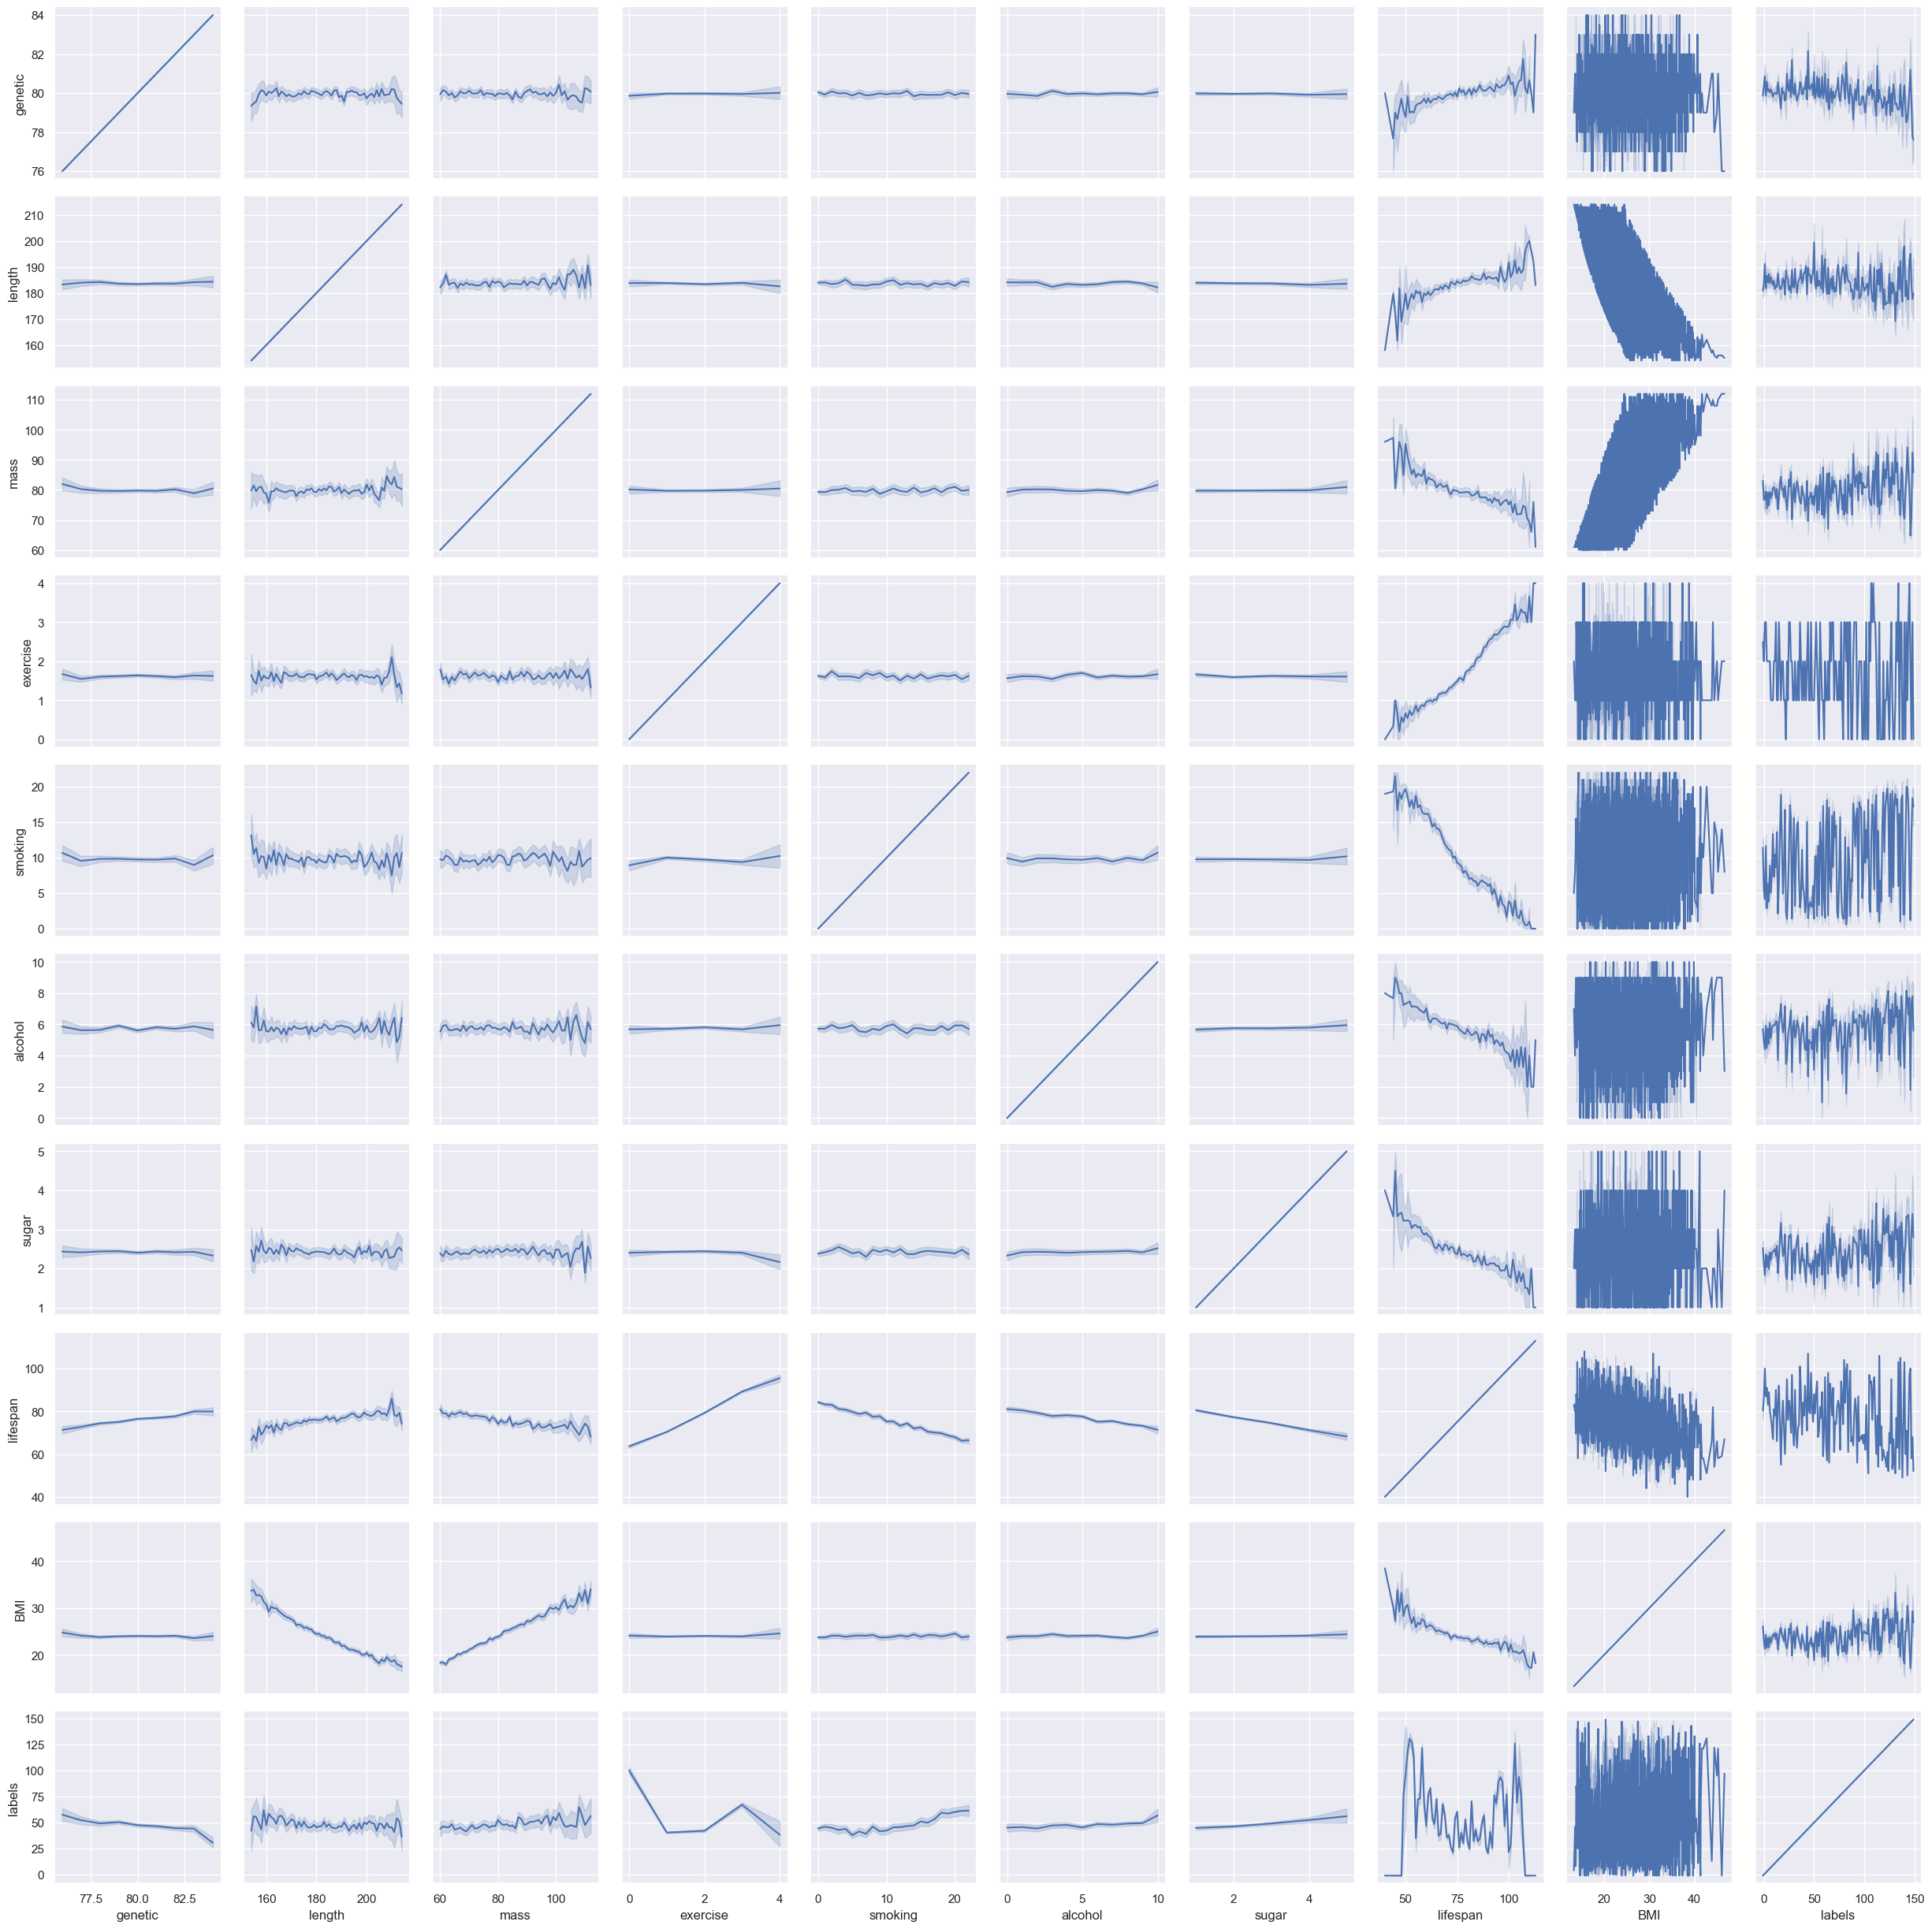

In [52]:
g = sns.PairGrid(df)
g.map(sns.lineplot)